In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)
    
    # get tv (index = 0)
    tv_data = get_column(data, 0)
    
    # get radio (index = 0)
    radio_data = get_column(data, 1)
    
    # get newspaper (index = 2)
    newspaper_data = get_column(data, 2)
    
    # get sales (index = 3)
    sales_data = get_column(data, 3)
    
    # build X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    
    return X, y

In [3]:
X, y = prepare_data('../data/advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(list)


[624.1, 175.10000000000002, 300.5, 78.9]


In [4]:
def initialize_params():
    #w1 = random.gauss(mu=0.0, sigma=0.01)
    #w2 = random.gauss(mu=0.0, sigma=0.01)
    #w3 = random.gauss(mu=0.0, sigma=0.01)
    #b = 0
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

In [5]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = x1 * w1 + x2 * w2 + x3 * w3 + b
    return result

y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [6]:
def compute_loss_mse(y, y_hat):
    return (y_hat - y) ** 2

def compute_loss_mae(y, y_hat):
    return abs(y_hat - y)

l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [7]:
# compute gradient
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db

# MSE loss
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-1.0
-3.0


In [8]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b

after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

1.000005
0.50001


In [9]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr = 1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # compute loss
            loss = compute_loss_mse(y, y_hat)
            
            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_wi(b, dl_db, lr)
            
            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)
    

In [10]:
X, y = prepare_data('../data/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


predicted sales is 8.176413319549823


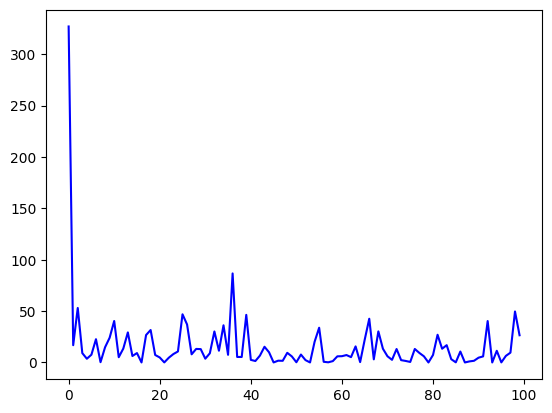

In [12]:
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('../data/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

plt.figure()
plt.plot(range(100), losses[:100],'b')

In [13]:
def implement_linear_regression_mae(X_data, y_data, epoch_max=50, lr = 1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # compute loss
            loss = compute_loss_mae(y, y_hat)
            
            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            # update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_wi(b, dl_db, lr)
            
            # logging
            losses.append(loss)
    return (w1, w2, w3, b, losses)

In [15]:
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


predicted sales is 8.176413319549823


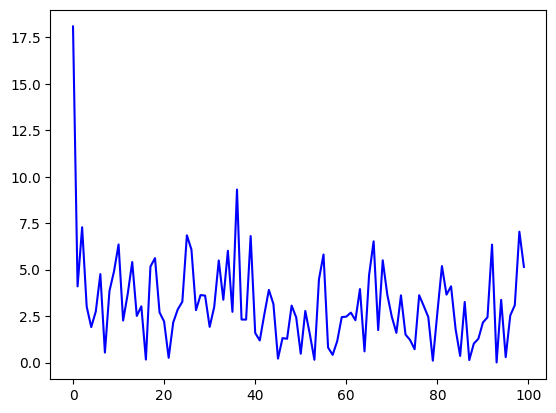

In [14]:
tv = 19.2
radio = 35.9
newspaper = 51.3

X, y = prepare_data('../data/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_mae(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

plt.figure()
plt.plot(range(100), losses[:100],'b')

In [21]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5, loss_func=compute_loss_mse):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    N = len(y_data)
    
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        
        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            # compute loss
            loss = loss_func(y, y_hat)
            
            # accumulate loss
            loss_total += loss
            
            # compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)
            
            # accumulate gradient w1 , w2 , w3 , b
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db
            
        # ( after processing N samples ) - update parameters
        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_wi(b, db_total/N, lr)
        
        # logging
        losses.append(loss_total / N)
    return (w1, w2, w3, b, losses)

[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

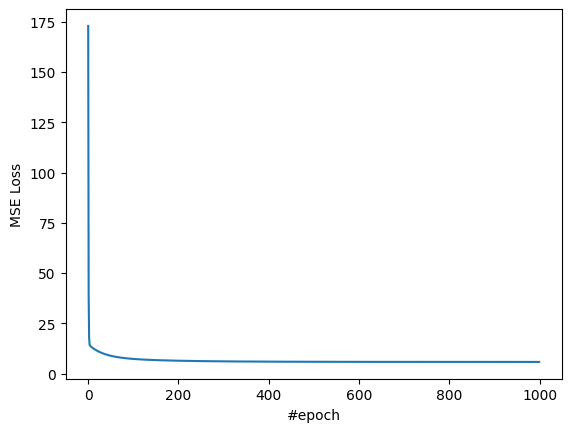

In [20]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr =1e-5)
print(losses)
print(w1, w2, w3)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

[12.537758993110772, 5.905253690937074, 3.7290201321746137, 3.280103342013847, 3.1836865214240593, 3.1504551681146706, 3.1282032310037176, 3.107834776878128, 3.0877653671823877, 3.067869077619822, 3.0482166503078565, 3.02883345816351, 3.0097268958233707, 2.990926260388694, 2.9724018229858893, 2.954147483295836, 2.936159497829541, 2.9184793882434996, 2.9013201899015386, 2.8848065446993694, 2.8692913979087806, 2.8540808729447424, 2.8391539128581824, 2.824441258695949, 2.809939593214031, 2.795661552510065, 2.781611479829696, 2.7677616004414416, 2.7541088214511316, 2.7406510256334013, 2.727970116901554, 2.7155029638904806, 2.703211839174965, 2.6910940299623816, 2.6792629854501695, 2.6676459659520204, 2.6561923391983115, 2.645064404704684, 2.6341944320960224, 2.623535606535408, 2.6130255229490116, 2.6026618964920454, 2.592442478315787, 2.5823650549969863, 2.5725241259925906, 2.562865212228721, 2.553339917055549, 2.5439461929615637, 2.5347454167598515, 2.525816782277532, 2.517347376120849, 2

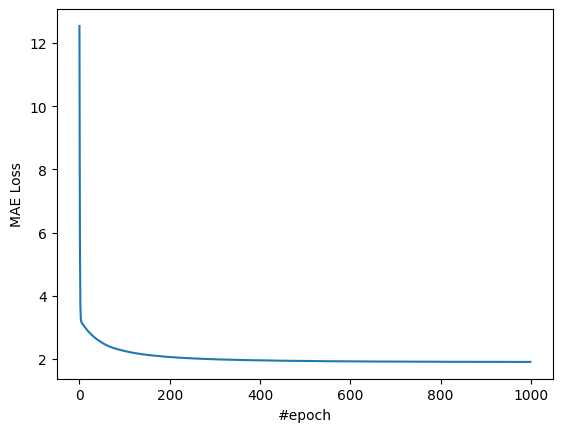

In [23]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr =1e-5, loss_func=compute_loss_mae)
print(losses)
print(w1, w2, w3)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

In [24]:
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)
    
    # get tv (index = 0)
    tv_data = get_column(data, 0)
    
    # get radio (index = 0)
    radio_data = get_column(data, 1)
    
    # get newspaper (index = 2)
    newspaper_data = get_column(data, 2)
    
    # get sales (index = 3)
    sales_data = get_column(data, 3)
    
    # build X input and y output for training
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    
    return X, y

In [25]:
def initialize_params():
    #w1 = random.gauss(mu=0.0, sigma=0.01)
    #w2 = random.gauss(mu=0.0, sigma=0.01)
    #w3 = random.gauss(mu=0.0, sigma=0.01)
    #bias = 0
    bias, w1, w2, w3 = (0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845)
    return w1, w2, w3, b

In [26]:
# Predict output by using y = x0*b + x1*w1 + x2*w2 + x3*w3

def predict (X_features , weights) :

    result = np.sum([x * w for x, w in zip(X_features, weights)])

    return result

def compute_loss(y_hat, y):
    return (y_hat - y)**2

# compute gradient
def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [2 * x * (y_hat - y) for x in X_features]

    return dl_dweights

# update weights
def update_weight(weights, dl_dweights, lr):

    weights = [w - lr * dl for w, dl in zip(weights, dl_dweights)]

    return weights

In [30]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)
    
    for epoch in range(epoch_max):
        print("epoch", epoch)
        for i in range(N):
            # get a sample - row i
            features_i = X_feature[i]
            y = y_output[i]
            
            # Compute output
            y_hat = predict(features_i, weights)
            
            # compute loss
            loss = compute_loss(y, y_hat)
            
            # compute gradient w1, w2, w3, b
            dl_weights = compute_gradient_w(features_i, y, y_hat)
            
            # update parameters
            weights = update_weight(weights, dl_weights, lr)
            
            # logging
            losses.append(loss)
    return weights, losses

epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10
epoch 11
epoch 12
epoch 13
epoch 14
epoch 15
epoch 16
epoch 17
epoch 18
epoch 19
epoch 20
epoch 21
epoch 22
epoch 23
epoch 24
epoch 25
epoch 26
epoch 27
epoch 28
epoch 29
epoch 30
epoch 31
epoch 32
epoch 33
epoch 34
epoch 35
epoch 36
epoch 37
epoch 38
epoch 39
epoch 40
epoch 41
epoch 42
epoch 43
epoch 44
epoch 45
epoch 46
epoch 47
epoch 48
epoch 49
31.541017582589138


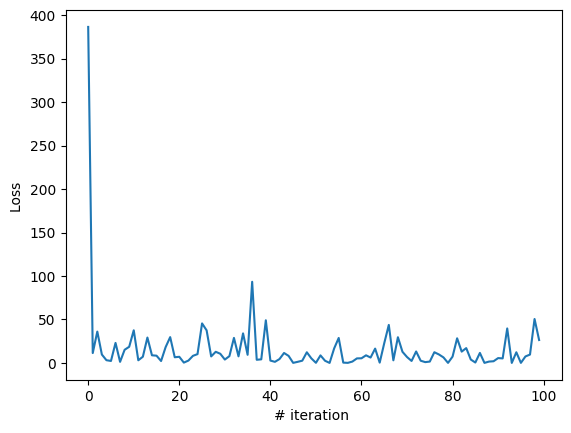

In [32]:
X, y = prepare_data('../data/advertising.csv')
W, L = implement_linear_regression(X, y)
print(L[9999])
plt.plot(L[0:100])
plt.xlabel("# iteration ")
plt.ylabel("Loss ")
plt.show()